In [25]:
import json

import pandas as pd

In [112]:
# 

with open('simulator_data.ods', 'rb') as f:
    df = pd.read_excel(f, engine='odf')

In [113]:
df

,qbits,Unnamed: 1,acc,f1,rec,Unnamed: 5,acc.1,f1.1,rec.1,Unnamed: 9,acc.2,f1.2,rec.2,Unnamed: 13,acc.3,f1.3,rec.3
0,2,zzFeatureMap,0.571,0.565,0.727,pauliFeatureMap,0.476,0.461,0.636,zzPhiFeatureMap,0.524,0.517,0.636,zFeatureMap,0.476,0.461,0.682
1,4,zzFeatureMap,0.571,0.565,0.682,pauliFeatureMap,0.476,0.461,0.636,zzPhiFeatureMap,0.524,0.517,0.636,zFeatureMap,0.476,0.461,0.636
2,8,zzFeatureMap,0.548,0.547,0.591,pauliFeatureMap,0.548,0.531,0.727,zzPhiFeatureMap,0.571,0.569,0.636,zFeatureMap,0.429,0.367,0.727
3,10,zzFeatureMap,0.595,0.595,0.636,pauliFeatureMap,0.548,0.538,0.682,zzPhiFeatureMap,0.667,0.667,0.682,zFeatureMap,0.452,0.403,0.727
4,12,zzFeatureMap,0.524,0.517,0.636,pauliFeatureMap,0.548,0.520,0.773,zzPhiFeatureMap,0.571,0.559,0.727,zFeatureMap,0.500,0.481,0.682
5,16,zzFeatureMap,0.548,0.538,0.682,pauliFeatureMap,0.548,0.531,0.727,zzPhiFeatureMap,0.643,0.642,0.682,zFeatureMap,0.476,0.461,0.636
6,20,zzFeatureMap,0.548,0.538,0.636,pauliFeatureMap,0.548,0.531,0.773,zzPhiFeatureMap,0.643,0.642,0.727,zFeatureMap,0.476,0.461,0.591
7,24,zzFeatureMap,0.548,0.538,0.545,pauliFeatureMap,0.548,0.531,0.818,zzPhiFeatureMap,0.643,0.642,0.636,zFeatureMap,0.476,0.461,0.591


In [114]:
# take first thirda and forth column of df
zz_df = df.iloc[:, [0, 2, 3, 4]]
pauli_df = df.iloc[:, [0, 6,7,8]]
zzPhi_df = df.iloc[:, [0, 10, 11, 12]]
z_df = df.iloc[:, [0, 14, 15, 16]]

In [115]:
pauli_df.rename(columns={
    'acc.1': 'acc',
    'f1.1': 'f1',
    'rec.1': 'rec'
}, inplace=True)
zzPhi_df.rename(columns={
    'acc.2': 'acc',
    'f1.2': 'f1',
    'rec.2': 'rec'
}, inplace=True)
z_df.rename(columns={
    'acc.3': 'acc',
    'f1.3': 'f1',
    'rec.3': 'rec'
}, inplace=True)

/var/folders/gm/6zjcwbd164d1v4gmx73009pr0000gp/T/ipykernel_77911/2393646622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pauli_df.rename(columns={
/var/folders/gm/6zjcwbd164d1v4gmx73009pr0000gp/T/ipykernel_77911/2393646622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zzPhi_df.rename(columns={
/var/folders/gm/6zjcwbd164d1v4gmx73009pr0000gp/T/ipykernel_77911/2393646622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_

In [116]:
z_df

,qbits,acc,f1,rec
0,2,0.476,0.461,0.682
1,4,0.476,0.461,0.636
2,8,0.429,0.367,0.727
3,10,0.452,0.403,0.727
4,12,0.500,0.481,0.682
5,16,0.476,0.461,0.636
6,20,0.476,0.461,0.591
7,24,0.476,0.461,0.591


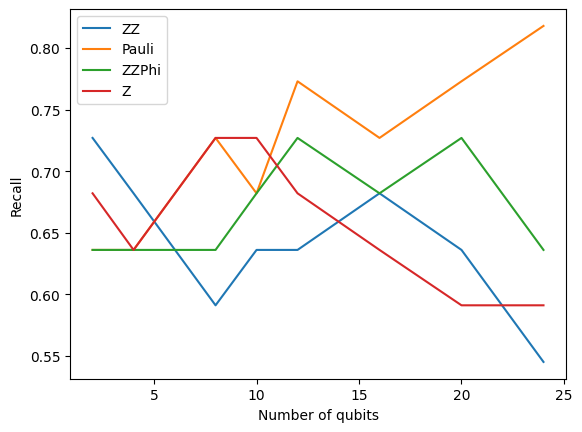

In [117]:
# plot recall of each model
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(zz_df['qbits'], zz_df['rec'], label='ZZ')
ax.plot(pauli_df['qbits'], pauli_df['rec'], label='Pauli')
ax.plot(zzPhi_df['qbits'], zzPhi_df['rec'], label='ZZPhi')
ax.plot(z_df['qbits'], z_df['rec'], label='Z')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Recall')
ax.legend()
plt.show()

In [118]:
# for each cell, select the cell from the model with the highest recall
max_df = pd.DataFrame()
max_df['qbits'] = zz_df['qbits']
max_df['rec'] = max(zz_df, pauli_df, zzPhi_df, z_df, key=lambda x: x['rec'] )

max_df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [119]:
df_max = pd.DataFrame()
df_max['qbit'] = df['qbits']

In [120]:
df_max['acc'] = df[['acc', 'acc.1', 'acc.2', 'acc.3']].max(axis=1)
df_max['f1'] = df[['f1', 'f1.1', 'f1.2', 'f1.3']].max(axis=1)
df_max['rec'] = df[['rec', 'rec.1', 'rec.2', 'rec.3']].max(axis=1)

In [121]:
df_max

,qbit,acc,f1,rec
0,2,0.571,0.565,0.727
1,4,0.571,0.565,0.682
2,8,0.571,0.569,0.727
3,10,0.667,0.667,0.727
4,12,0.571,0.559,0.773
5,16,0.643,0.642,0.727
6,20,0.643,0.642,0.773
7,24,0.643,0.642,0.818


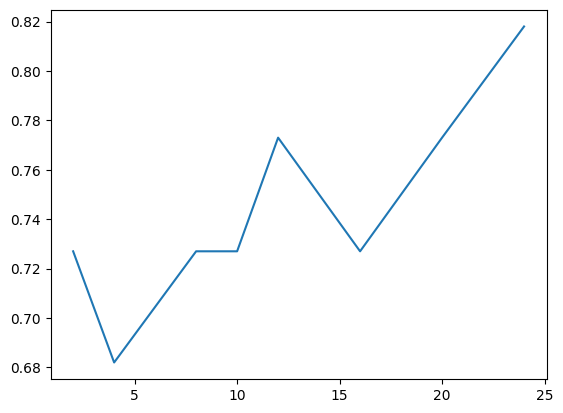

In [122]:
fig, ax = plt.subplots()
ax.plot(df_max['qbit'], df_max['rec'])


In [126]:
with open('results.json', 'r') as f:
    clasic_res = json.load(f)

In [127]:
clasic_res

{'2': {'best_params': "{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",
  'recall': 0.6538461538461539,
  'accuracy': 0.6666666666666666,
  'best_score': 0.6078431372549019,
  'f1': 0.7083333333333334},
 '4': {'best_params': "{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",
  'recall': 0.6538461538461539,
  'accuracy': 0.7142857142857143,
  'best_score': 0.770944741532977,
  'f1': 0.7391304347826086},
 '6': {'best_params': "{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",
  'recall': 0.8461538461538461,
  'accuracy': 0.9047619047619048,
  'best_score': 0.8133689839572193,
  'f1': 0.9166666666666666},
 '8': {'best_params': "{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",
  'recall': 0.8846153846153846,
  'accuracy': 0.9047619047619048,
  'best_score': 0.8377896613190732,
  'f1': 0.92},
 '10': {'best_params': "{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",
  'recall': 0.8461538461538461,
  'accuracy': 0.8571428571428571,
  'best_score': 0.861319073083779,
  'f1': 0.88},
 '12': {'best_params': "{'C': 10, 'gamma

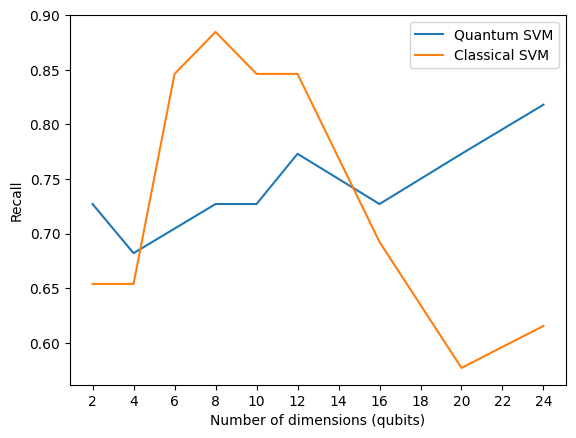

In [131]:
fig, ax = plt.subplots()
ax.plot(df_max['qbit'], df_max['rec'], label='Quantum SVM')

ax.plot([int(x) for x in clasic_res.keys()], [clasic_res[k]['recall'] for k in clasic_res.keys()], label='Classical SVM')

# set y axis to 0 to 1 range
# ax.set_ylim([0, 1])

# set x ticts to integers
ax.set_xticks(range(2, 25, 2))

ax.set_xlabel('Number of dimensions (qubits)')
ax.set_ylabel('Recall')
ax.legend()


plot_file_format = "png"
plot_file_dpi = 300
plot_file_bbox_inches = 'tight'
plt.savefig(f"final_line_chart.{plot_file_format}", format=plot_file_format, bbox_inches=plot_file_bbox_inches, dpi=plot_file_dpi)
plt.show()

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

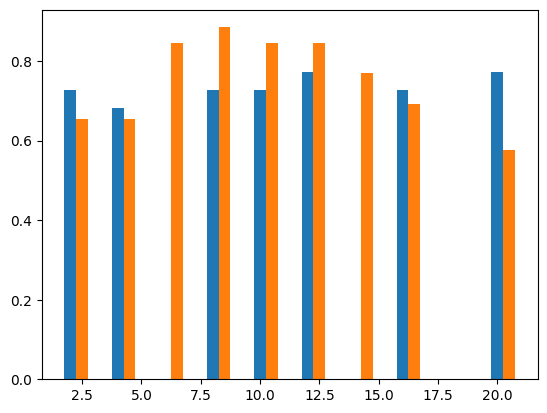

In [104]:
# create a bar chart with the same data. Put bars side by side
# fig, ax = plt.subplots()
ind = 2
width = 0.5
ax = plt
# ax.bar(df_max['qbit'], df_max['rec'], width, label='Quantum stuff')
ax.bar(df_max['qbit'], df_max['rec'], width, label='Quantum stuff')
ax.bar([int(x) + width for x in clasic_res.keys()], [clasic_res[k]['recall'] for k in clasic_res.keys()], width, label='Classical stuff')
# ax.set_xlabel('Number of dimensions (qubits)')
# ax.set_ylabel('Recall')

plt.xticks(ind + width / 2, ('Xtick1', 'Xtick3'))

ax.legend()
    
